### Project Overview

The aim of this projects is to introduce you to data visualiazation with Python as concrete and as consistent as possibe. Using what you've learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:
* `lsoa_code`: this represents a policing area
* `borough`: the london borough for which the statistic is related
* `major_category`: the major crime category
* `minor_category`: the minor crime category
* `value`: the count of the crime for that particular borough, in that particular month
* `year`: the year of the summary statistic
* `month`: the month of the summary statistic

### Import library yang dibutuhkan

In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth

### import dataset

In [2]:
df_london_crime= pd.read_csv('./dataset/london_crime_by_lsoa.csv')
df_london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df_london_crime.shape

(13490604, 7)

In [4]:
df_london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
df_london_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

### Bar Chart

In [6]:
crime_of_year = df_london_crime.groupby('year')['value'].sum()
crime_of_year

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

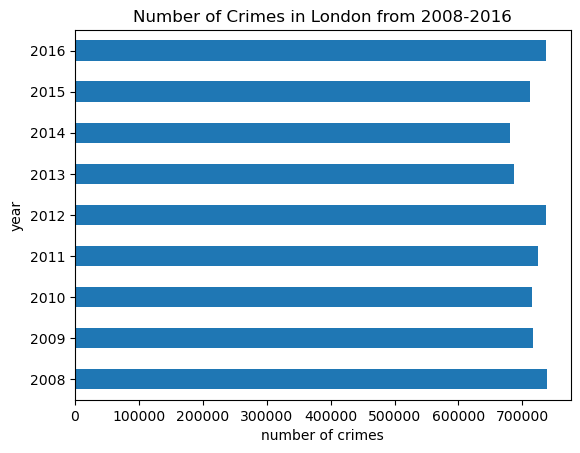

In [7]:
crime_of_year.plot(kind='barh')
plt.title('Number of Crimes in London from 2008-2016')
plt.xlabel('number of crimes')
plt.show()

Dari hasil bar chart diatas bisa dilihat kejahatan yang tertinggi dari tahun 2008-2016 di London terjadi pada tahun 2008 yaitu sebanyak 738641 kasus. dan yang terendah terjadi pada tahun 2014 yaitu sebanyak 680183 kasus.

In [8]:

crime_borough = df_london_crime.groupby(['minor_category', 'year'])['value'].sum()
crime_borough = crime_borough.reset_index('year')
crime_borough = crime_borough.loc[crime_borough['year'] == 2016]
crime_borough = crime_borough['value']
crime_borough

minor_category
Assault with Injury                        50038
Burglary in Other Buildings                25289
Burglary in a Dwelling                     42996
Business Property                           1654
Common Assault                             64440
Counted per Victim                             0
Criminal Damage To Dwelling                13951
Criminal Damage To Motor Vehicle           25787
Criminal Damage To Other Building           6700
Drug Trafficking                            3392
Going Equipped                               604
Handling Stolen Goods                       1377
Harassment                                 78676
Motor Vehicle Interference & Tampering     11438
Murder                                       101
Offensive Weapon                            5013
Other Criminal Damage                      17633
Other Drugs                                  319
Other Fraud & Forgery                          0
Other Notifiable                           15205
Other

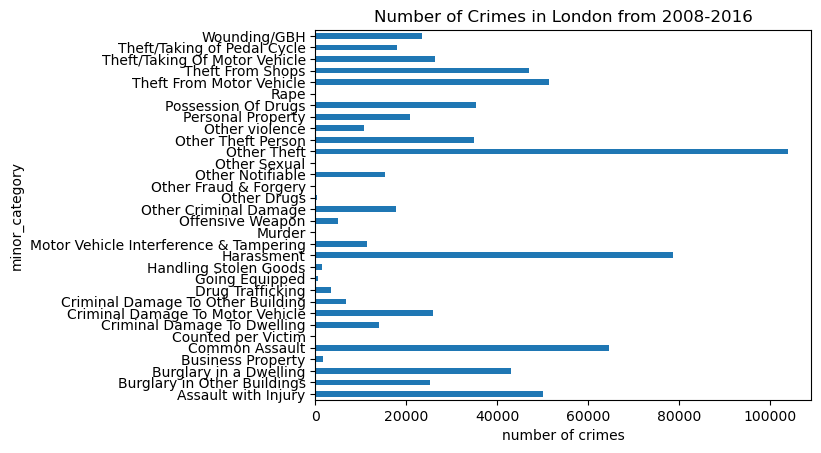

In [9]:
crime_borough.plot(kind='barh')
plt.title('Number of Crimes in London from 2008-2016')
plt.xlabel('number of crimes')
plt.show()

Berdasarkan bar chart diatas kejahatan tertinggi di london dalam kategori minor_category pada tahun 2008-2016 adalah "other thef" yaitu lebih dari 100 ribu kasus, dan kejahatan yang memiliki 0 kasus yaitu "Counted per Victim, Other Fraud & Forgery, Other Sexual, Rape".

### Pie Chart

In [10]:
crime_2016 = df_london_crime.groupby('major_category')['value'].sum()
crime_2016

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64

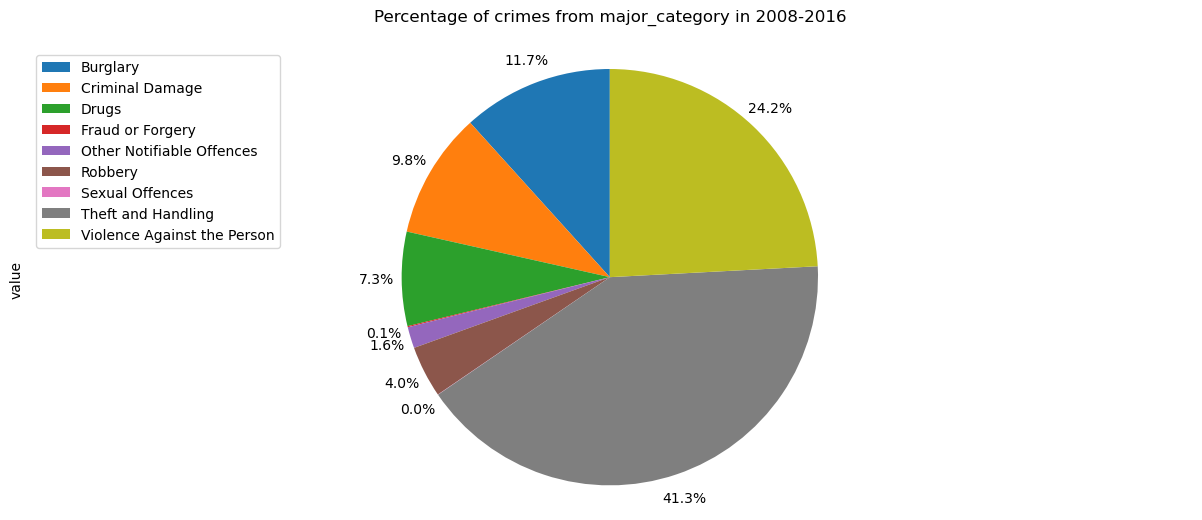

In [11]:
crime_2016.plot(kind='pie',
                figsize=(15,6),
                autopct='%1.1f%%',
                startangle=90,
                labels=None,
                pctdistance= 1.12)

plt.legend(crime_2016.index, loc='upper left')
plt.title('Percentage of crimes from major_category in 2008-2016\n')
plt.axis('equal')
plt.show()

Pada pie char diatas dapat dilihat bahwa persentase kejahatan tertinggi yang terjadi dari tahun 2008-2016 yaitu Theft and Handling sebesar 41.3% dan kejahatan dengan persentase terendah yaitu Criminal Damage sebesar 0.1%

### Scatter Plot
data diambil dari jumlah kejahatan yang terjadi pada tahun 2016

In [12]:
font = {'family': 'Verdana',
        'color':  'royalblue',
        'weight': 'bold',
        'size': 30,
        }
year2016=df_london_crime.loc[df_london_crime['year'] == 2016]

months=year2016['month'].unique()

months.sort()

sum_month=year2016.groupby(['month']).sum()

Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)
n1 = np.arange(len(months))
xrange=range(1,13)

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


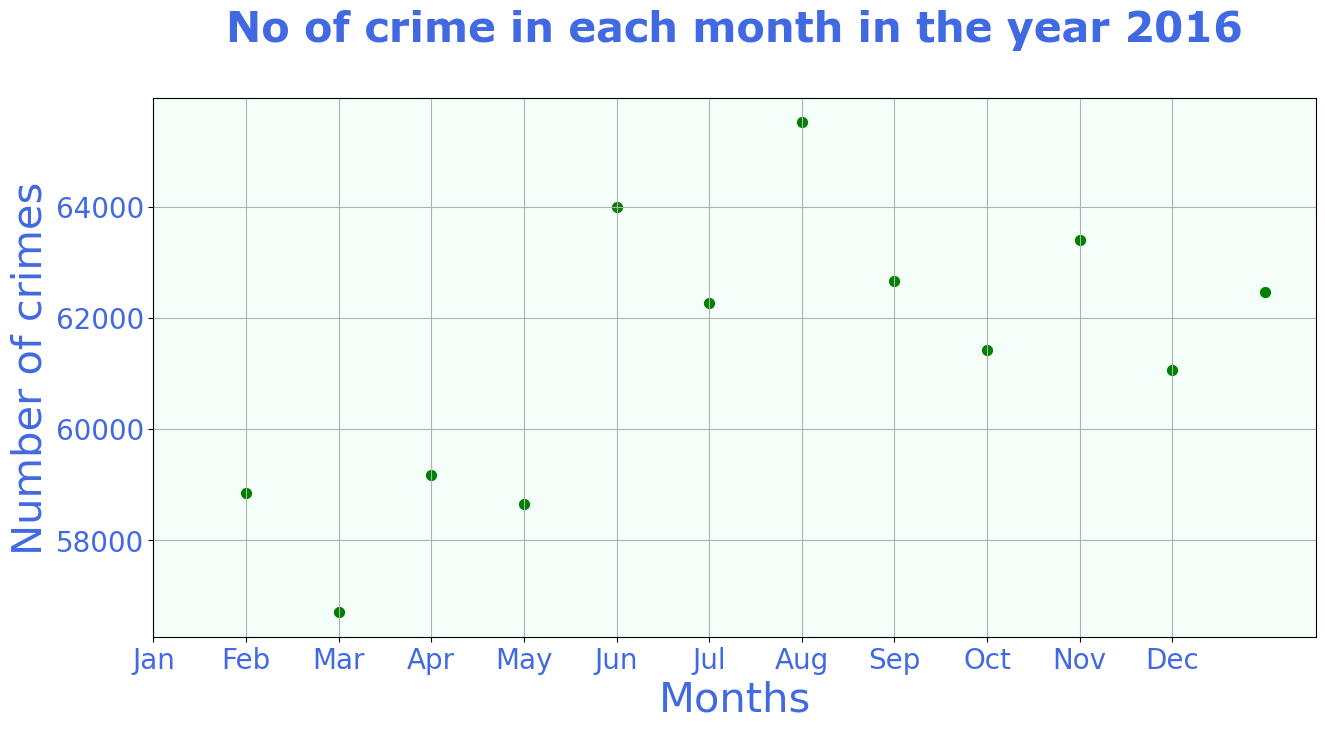

In [13]:
plt.figure(figsize=(15,7))
ax = plt.axes()
ax.set_facecolor("mintcream")
plt.scatter(xrange,Values,s=50,color='green',cmap='varidis',alpha=1)
plt.title("No of crime in each month in the year 2016\n",fontdict=font)
plt.xlabel('Months',fontsize=30,color='royalblue')
plt.ylabel('Number of crimes',fontsize=30,color='royalblue')
plt.xticks(n1,name_of_months)
plt.xticks(color='royalblue',fontsize=20)
plt.yticks(color='royalblue',fontsize=20)
plt.grid()
plt.show()

Berdasarkan scatter plot diatas bisa dilihat bahwa jumlah kejahatan yang banyak terjadi ditahun 2016 terjadi pada bulan juli dengan jumlah kasus lebih dari 64 ribu kasus dan dan diikuti bulan mei dengan jumlah kasus hampir mencapai 64 ribu.

### Word cloud
kata yang digunakan untuk word cloud diambil dari kolom borough

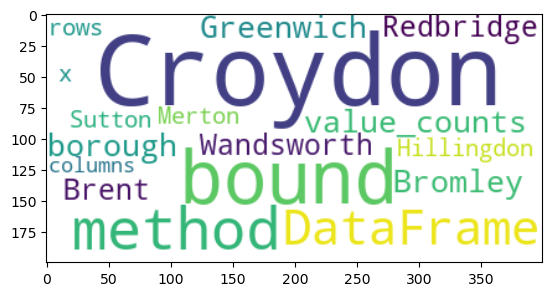

In [14]:
from wordcloud import WordCloud

text = df_london_crime[['borough']].value_counts

wordcloud = WordCloud(background_color='white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Dari hasil wordcloud diatas diambil dari nama kota yang ada pada london. semakin banyak nama kota yg muncul maka tulisan akan semakin besar. Sehingga bisa disimpulkan bahwa kota yang paling banyak terjadi kejahatan di london adalah Croydon

### Folium
London Maps

In [25]:
print("Crime rate in boroughs of london")
print("please zoom in to view the map")
df2=df_london_crime.groupby('borough')['value'].sum()
world_geo = r'./dataset/map/london_boroughs.GeoJSON' 
world_map=folium.Map(location=[51.5135942184717, -0.13073109534619823],zoom_start=10, tiles="OpenStreetMap")

world_map.choropleth(
    geo_data=world_geo,
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='Paired', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)

folium.LayerControl().add_to(world_map)
# display(world_map)
world_map

Crime rate in boroughs of london
please zoom in to view the map
